In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import SLSQP

In [2]:
executor = Executor("statevector_simulator")

Define parameterized quantum circuit $Q(x,\theta)$

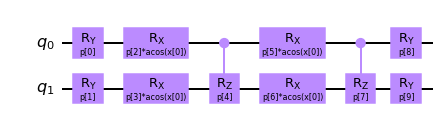

In [3]:
nqubits = 2
pqc = ChebPQC(num_qubits=nqubits, num_features=1, num_layers=2)
pqc.draw()

Definition of the cost operator:
$\hat{H} = J \sum\limits_{i < j} Z_i Z_j + h\sum\limits_i Z_i + c$

In [4]:
op = SummedPaulis(2)
print(op)

SparsePauliOp(['II', 'IZ', 'ZI'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2])])


Example function: $log(x)$

In [5]:
x_space = np.arange(-0.5, 0.6, 0.1)
ref_values = np.square(x_space)

np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.ones(op.num_parameters)

reg = QNNRegressor(pqc, op, executor, SquaredLoss(), SLSQP(), param_ini, param_op_ini)

Optimization of the regression

In [6]:
reg.fit(x_space, ref_values)

theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 1.         1.
 1.        ]
Current value: 3.1574234434268873
theta [0.77770241 0.23754122 0.82427853 0.9657492  0.97260111 0.45344925
 0.60904246 0.77552651 0.64161334 0.72201823 1.         1.
 1.        ]
Grad length: 16.201510077854078
grad [-1.11504426 -1.29234082  4.15922153 -2.78467197 -3.83681428  5.77086431
 -0.72177487 -1.22630784  3.55182494 -0.64637157 -8.50578704  6.93199853
  7.14414841]
theta [ 1.89274668  1.52988204 -3.334943    3.75042117  4.8094154  -5.31741507
  1.33081733  2.00183435 -2.91021159  1.3683898   9.50578704 -5.93199853
 -6.14414841]
Current value: 1823.8187277318118
theta [ 0.88920684  0.3667753   0.40835638  1.2442164   1.35628254 -0.12363718
  0.68121995  0.8981573   0.28643085  0.78665539  1.8505787   0.30680015
  0.28558516]
Current value: 31.197031862043175
theta [0.80465902 0.26878404 0.72372781 1.03306968 1.06535752 0.31393646
 0.626

In [7]:
print("Result Param:", reg.param)
print("Result ParamOp:", reg.param_op)

Result Param: [1.11060058 0.54266007 0.69430934 1.15808629 1.19498135 0.03164722
 0.70569019 0.67874735 1.11414215 0.67722355]
Result ParamOp: [0.67174265 0.12524797 0.83743793]


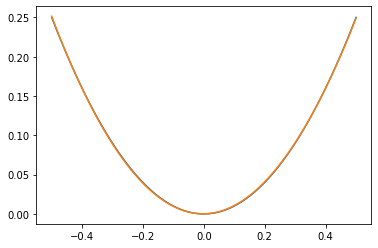

In [8]:
x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = reg.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options

service = QiskitRuntimeService(channel="ibm_quantum",token="1e1fcef3940bc7181262dbc135a052e83b17a669f187b1d6d7bde96ef3167078b55eb494f44f3b3de8ea934023da7a5eef3df4c6d27bf8ce7d48ca174c654cb7")
executor_backend = Executor(service.get_backend('ibmq_manila'))

In [10]:
qnn_backend = QNNRegressor(pqc, op, executor_backend, SquaredLoss(), SLSQP(), reg.param, reg.param_op)

In [11]:
x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

C:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\src\squlearn\qnn\qnnr.py:133: UserWarning: The model is not fitted.
  warn("The model is not fitted.")
